# Pytorch Workflow Clean version

In [41]:
#Import necessary modules
import torch
from torch import nn

import matplotlib.pyplot as plt

## Data Preparation

for This project we will use known data

In [42]:
#known parameters

weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

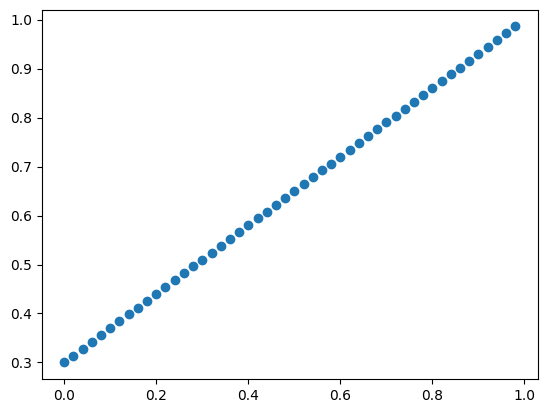

In [43]:
# Visualize data
plt.scatter(X,y)

plt.show()

## Split Data into train and test data sets

In [44]:
# Create train/test data
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

Exploring our Data

Visualize our data to see what you're working with

In [45]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  '''
  Plot training data, test data and the compare to predictions
  '''
  plt.figure(figsize=(10,7))

  #Plot training Data in blue
  plt.scatter(train_data,train_labels,c='b',s=4, label="Training data")

  # Plot testing in Green
  plt.scatter(test_data,test_labels,c='y',s=4,label="Testing Data")

  # When we have predictions
  if predictions is not None:
    # Plot Predictions in Red
    plt.scatter(test_data,predictions,c='r', s=4, label ="Predictions")

  #Show the legend
  plt.legend(prop={"size":14})


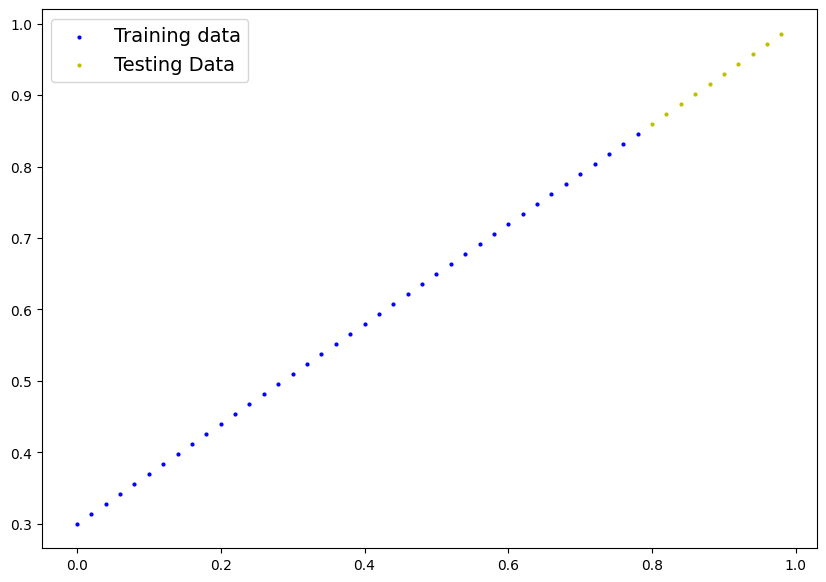

In [46]:
plot_predictions()

## Build Model

We will use a linear regression model

In [56]:
# Create a LInear regression model

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

In [57]:
# Checking the contents of our Pytorch model
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [58]:
# Predicting
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [59]:
# MAke prediction with torch.inference_mode()

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds



tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [60]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

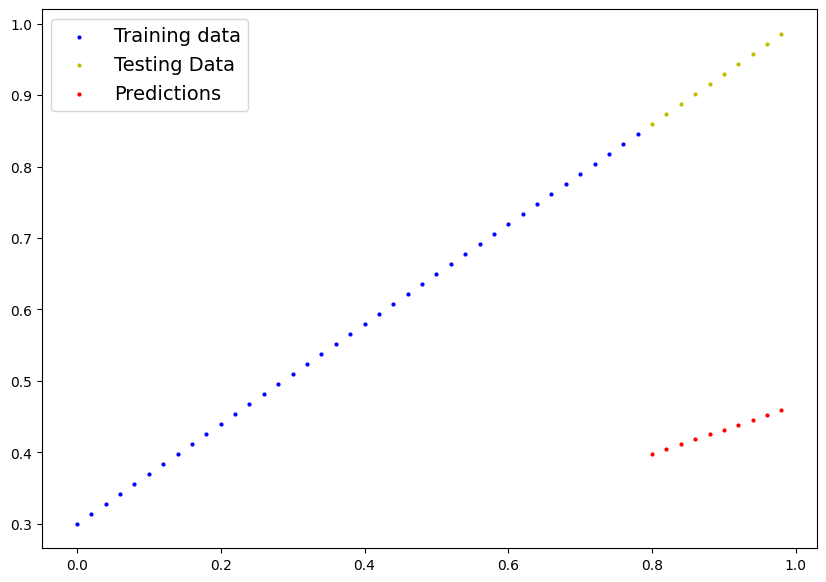

In [61]:
plot_predictions(predictions=y_preds)

## Train a Model

In [63]:
# Set up a loss function
loss_fn = nn.L1Loss()

# Set up optimizer
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            lr=0.01)

### Building a training Loop and a testing loop in Pytorch

In [65]:
epochs = 100

# Training
for epoch in range(epochs):
  model_0.train()

  # 1.Forward pass
  y_preds = model_0(X_train)

  #2. calculate the loss
  loss = loss_fn(y_preds,y_train)

  #3 OPtimizer zero grad
  optimizer.zero_grad()

  #4 Perfom loss backpropagation
  loss.backward()

  #5 step the Optimizer
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    test_preds = model_0(X_test)
    test_loss = loss_fn(test_preds,y_test)

   #Print Out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    # Print Out model.State_dict()
    print(model_0.state_dict())




Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.47563618421554565
OrderedDict([('weight', tensor([0.3467])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.17388132214546204 | Test Loss: 0.2866361737251282
OrderedDict([('weight', tensor([0.4467])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.042198795825242996 | Test Loss: 0.0987466350197792
OrderedDict([('weight', tensor([0.5466])), ('bias', tensor([0.3378]))])
Epoch: 30 | Loss: 0.044207725673913956 | Test Loss: 0.005456471350044012
OrderedDict([('weight', tensor([0.6069])), ('bias', tensor([0.3790]))])
Epoch: 40 | Loss: 0.02264046110212803 | Test Loss: 0.0635034516453743
OrderedDict([('weight', tensor([0.5870])), ('bias', tensor([0.3370]))])
Epoch: 50 | Loss: 0.017085570842027664 | Test Loss: 0.04095946624875069
OrderedDict([('weight', tensor([0.6223])), ('bias', tensor([0.3282]))])
Epoch: 60 | Loss: 0.008707192726433277 | Test Loss: 0.013333350419998169
OrderedDict([('weight', tensor([0.6657])), ('bias', tensor([0.3172]))

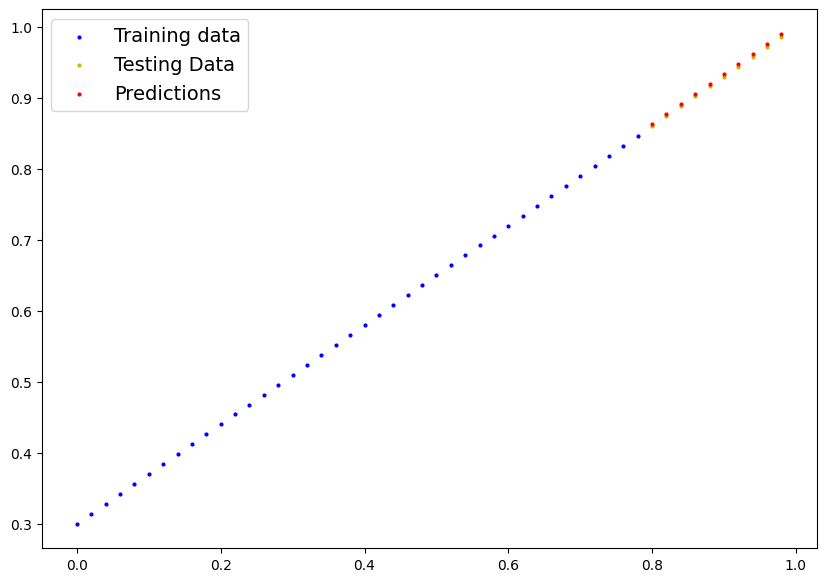

In [67]:
with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)